In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import mean_squared_error, r2_score

sns.set()
pd.set_option("chained_assignment", None)

In [2]:
data = pd.read_csv("AirQualityUCI.csv")
data = data.iloc[:, :-2]
data['Date'] = data['Date'] + " " + data['Time']
data['Date'] = pd.to_datetime(data.Date)
data.drop(columns=['Time'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   CO(GT)         9357 non-null   float64       
 2   PT08.S1(CO)    9357 non-null   float64       
 3   NMHC(GT)       9357 non-null   float64       
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 1.0 MB


In [3]:
data.rename(columns={
    'T': 'Temp_c',
    'RH': 'Relative_humidity',
    'AH': 'Absolute_humidity'
},
inplace=True)

## Explore Different Variables

### Look at overall data (correlation and target variables, ie humidity/temp)

<AxesSubplot:>

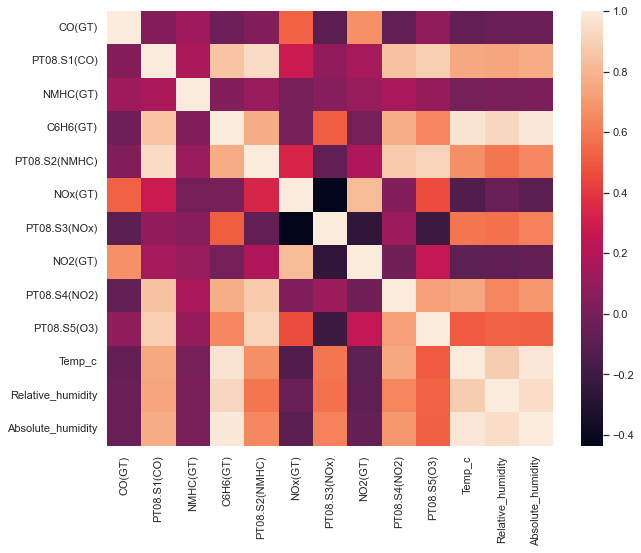

In [4]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr())

It looks like O6H6(GT) has a strong impact on both temperature and humidity. 

In [5]:
data.head()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Temp_c,Relative_humidity,Absolute_humidity
0,2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### Examine Individual Variables

In [6]:
print(data['CO(GT)'].describe())

count    9357.000000
mean      -34.207524
std        77.657170
min      -200.000000
25%         0.600000
50%         1.500000
75%         2.600000
max        11.900000
Name: CO(GT), dtype: float64


In [7]:
data.loc[data['CO(GT)']<=0, 'CO(GT)']

10     -200.0
34     -200.0
39     -200.0
58     -200.0
82     -200.0
        ...  
9058   -200.0
9130   -200.0
9202   -200.0
9274   -200.0
9346   -200.0
Name: CO(GT), Length: 1683, dtype: float64

It looks like -200 is a substitute for missing values, replace them whith NaN for now

In [8]:
data.replace(to_replace=-200, value=np.nan, inplace=True)
data.isna().sum()

Date                  114
CO(GT)               1797
PT08.S1(CO)           480
NMHC(GT)             8557
C6H6(GT)              480
PT08.S2(NMHC)         480
NOx(GT)              1753
PT08.S3(NOx)          480
NO2(GT)              1756
PT08.S4(NO2)          480
PT08.S5(O3)           480
Temp_c                480
Relative_humidity     480
Absolute_humidity     480
dtype: int64

In [9]:
# Drop reccords with missing date, or target var
for i in ['Date', 'Temp_c','Relative_humidity', 'Absolute_humidity']:
    data = data.loc[data[i].notnull()]


In [10]:
# Drop any reccords missing more than 8 of the independent variables
data.dropna(axis=0, thresh=11, inplace=True)
data.isna().sum()

Date                    0
CO(GT)                452
PT08.S1(CO)             0
NMHC(GT)             6909
C6H6(GT)                0
PT08.S2(NMHC)           0
NOx(GT)               400
PT08.S3(NOx)            0
NO2(GT)               403
PT08.S4(NO2)            0
PT08.S5(O3)             0
Temp_c                  0
Relative_humidity       0
Absolute_humidity       0
dtype: int64

In [11]:
data.loc[data['CO(GT)'].isna(), :].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 10 to 9346
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               452 non-null    datetime64[ns]
 1   CO(GT)             0 non-null      float64       
 2   PT08.S1(CO)        452 non-null    float64       
 3   NMHC(GT)           24 non-null     float64       
 4   C6H6(GT)           452 non-null    float64       
 5   PT08.S2(NMHC)      452 non-null    float64       
 6   NOx(GT)            452 non-null    float64       
 7   PT08.S3(NOx)       452 non-null    float64       
 8   NO2(GT)            452 non-null    float64       
 9   PT08.S4(NO2)       452 non-null    float64       
 10  PT08.S5(O3)        452 non-null    float64       
 11  Temp_c             452 non-null    float64       
 12  Relative_humidity  452 non-null    float64       
 13  Absolute_humidity  452 non-null    float64       
dtypes: datet

In [12]:
# Now examine CO(GT)
data['CO(GT)'].describe()

count    7344.000000
mean        2.129711
std         1.436472
min         0.100000
25%         1.100000
50%         1.800000
75%         2.800000
max        11.900000
Name: CO(GT), dtype: float64

<AxesSubplot:xlabel='CO(GT)', ylabel='Count'>

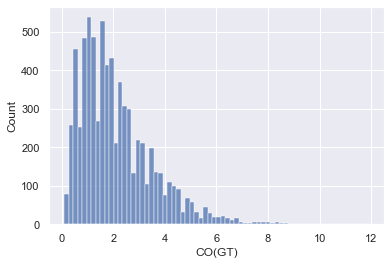

In [13]:
sns.histplot(data=data, x='CO(GT)')

<AxesSubplot:xlabel='CO(GT)'>

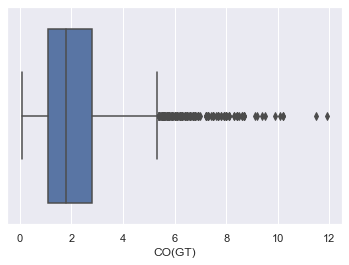

In [14]:
sns.boxplot(data=data, x='CO(GT)')

CO(GT) is still pretty skewed right, based on this I'll fill missing data with the data's median.

Scratch that, lets try interpolation on the hole data set

In [15]:
data.interpolate(method="pad", inplace=True)

In [16]:
data['CO(GT)'].describe()

count    7796.000000
mean        2.059389
std         1.434759
min         0.100000
25%         1.000000
50%         1.700000
75%         2.800000
max        11.900000
Name: CO(GT), dtype: float64

In [17]:
# Check to see how many outliers there are
iqr = data['CO(GT)'].quantile(0.75) - data['CO(GT)'].quantile(0.25)
upperqtr = data['CO(GT)'].median() + (1.5*iqr)

data.loc[data['CO(GT)']>=(1.5*iqr)+upperqtr, 'CO(GT)'].describe()

count    54.000000
mean      8.294444
std       1.040576
min       7.200000
25%       7.525000
50%       8.000000
75%       8.600000
max      11.900000
Name: CO(GT), dtype: float64

In [18]:
data.loc[data['CO(GT)']>=(1.5*iqr)+upperqtr].describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Temp_c,Relative_humidity,Absolute_humidity
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,8.294444,1759.111111,327.277778,38.696296,1737.555556,941.277778,404.888889,193.944444,2248.351852,2131.722222,16.620370,58.692593,1.138831
std,1.040576,136.324760,183.985481,7.214502,154.105779,268.321225,104.025336,39.013504,315.288796,194.006557,5.261479,11.912762,0.382619
min,7.200000,1479.000000,275.000000,22.900000,1375.000000,351.000000,322.000000,119.000000,1563.000000,1682.000000,6.200000,26.500000,0.457300
25%,7.525000,1671.250000,275.000000,34.125000,1646.000000,789.750000,348.250000,168.000000,1971.250000,2008.500000,13.300000,51.525000,0.913250
50%,8.000000,1770.000000,275.000000,37.800000,1725.000000,906.500000,374.500000,187.500000,2265.500000,2157.000000,16.050000,59.800000,1.095750
75%,8.600000,1834.750000,275.000000,44.400000,1859.750000,1149.750000,424.500000,226.500000,2522.250000,2236.500000,21.300000,67.375000,1.525800
max,11.900000,2040.000000,1189.000000,52.100000,2007.000000,1479.000000,1009.000000,272.000000,2775.000000,2523.000000,25.500000,79.300000,1.808800


In [19]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Temp_c,Relative_humidity,Absolute_humidity
count,7796.000000,7796.000000,7796.000000,7796.000000,7796.000000,7796.000000,7796.000000,7796.000000,7796.000000,7796.000000,7796.000000,7796.000000,7796.000000
mean,2.059389,1103.733581,271.606208,10.111775,940.374936,240.432016,833.622242,110.759492,1444.605952,1032.922781,17.968202,48.948794,0.997938
std,1.434759,217.972359,76.816841,7.415141,266.424936,205.212705,260.825736,47.484027,350.705705,404.674459,9.009417,17.510432,0.402323
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.000000,940.000000,275.000000,4.400000,735.000000,95.000000,654.000000,76.000000,1203.000000,737.000000,11.300000,35.300000,0.703875
50%,1.700000,1068.000000,275.000000,8.300000,913.000000,177.000000,799.000000,106.000000,1450.000000,976.000000,17.200000,49.200000,0.969900
75%,2.800000,1236.000000,275.000000,14.100000,1120.000000,323.000000,967.250000,139.000000,1673.250000,1291.000000,24.200000,62.500000,1.275525
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.180600


#### Examine PT08.S1

In [20]:
data['PT08.S1(CO)'].describe()

count    7796.000000
mean     1103.733581
std       217.972359
min       647.000000
25%       940.000000
50%      1068.000000
75%      1236.000000
max      2040.000000
Name: PT08.S1(CO), dtype: float64

<AxesSubplot:xlabel='PT08.S1(CO)', ylabel='Count'>

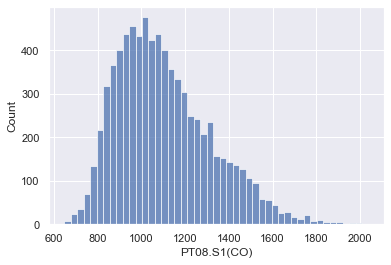

In [21]:
sns.histplot(data=data, x='PT08.S1(CO)')

<AxesSubplot:xlabel='PT08.S1(CO)'>

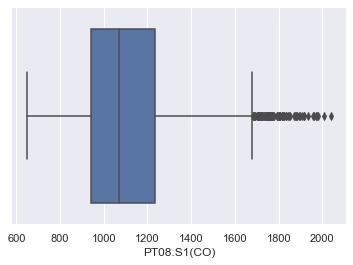

In [22]:
sns.boxplot(data=data, x='PT08.S1(CO)')

In [23]:
iqr = data['PT08.S1(CO)'].quantile(0.75) - data['PT08.S1(CO)'].quantile(0.25)
upper = (1.5*iqr) + data['PT08.S1(CO)'].quantile(0.75)

data.loc[data['PT08.S1(CO)']>upper, ['PT08.S1(CO)', 'Temp_c', 'Relative_humidity', 'Absolute_humidity']].describe()

,PT08.S1(CO),Temp_c,Relative_humidity,Absolute_humidity
count,97.000000,97.000000,97.000000,97.000000
mean,1791.041237,16.554639,56.707216,1.086316
std,83.147198,5.048618,10.933876,0.350611
min,1681.000000,6.200000,26.500000,0.457300
25%,1726.000000,12.400000,50.000000,0.845500
50%,1766.000000,16.100000,56.800000,0.999300
75%,1834.000000,20.900000,63.900000,1.260100
max,2040.000000,25.400000,79.300000,1.863200


In [24]:
# Now look at Temp_c
data.Temp_c.describe()

count    7796.000000
mean       17.968202
std         9.009417
min        -1.900000
25%        11.300000
50%        17.200000
75%        24.200000
max        44.600000
Name: Temp_c, dtype: float64

<AxesSubplot:xlabel='Temp_c', ylabel='Count'>

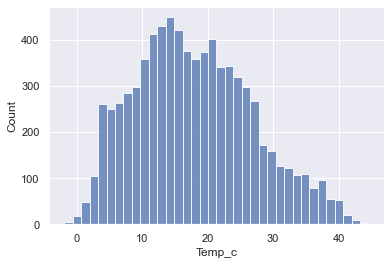

In [25]:
sns.histplot(data=data, x='Temp_c')

<AxesSubplot:xlabel='Temp_c'>

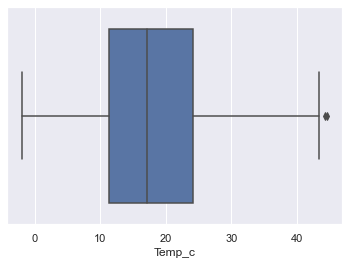

In [26]:
sns.boxplot(data=data, x='Temp_c')

In [27]:
iqr = data.Temp_c.quantile(0.75) - data.Temp_c.quantile(0.25)
upper = data.Temp_c.quantile(0.75) + (1.5*iqr)
upper 

43.55

In [28]:
data.loc[data.Temp_c>=upper, 'Temp_c'].describe()

count     2.000000
mean     44.450000
std       0.212132
min      44.300000
25%      44.375000
50%      44.450000
75%      44.525000
max      44.600000
Name: Temp_c, dtype: float64

<AxesSubplot:xlabel='Absolute_humidity', ylabel='Temp_c'>

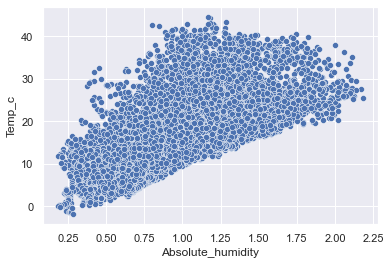

In [29]:
sns.scatterplot(data=data, x='Absolute_humidity', y='Temp_c')

#### Set time to day / night and group by month

In [30]:
# Add boolean column for day/night
data['day'] = 0
data.index = data.Date
data.loc[data.index.isin(data.between_time('8:00', '16:00').index), 'day'] = 1
data.reset_index(inplace=True, drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7796 entries, 0 to 7795
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               7796 non-null   datetime64[ns]
 1   CO(GT)             7796 non-null   float64       
 2   PT08.S1(CO)        7796 non-null   float64       
 3   NMHC(GT)           7796 non-null   float64       
 4   C6H6(GT)           7796 non-null   float64       
 5   PT08.S2(NMHC)      7796 non-null   float64       
 6   NOx(GT)            7796 non-null   float64       
 7   PT08.S3(NOx)       7796 non-null   float64       
 8   NO2(GT)            7796 non-null   float64       
 9   PT08.S4(NO2)       7796 non-null   float64       
 10  PT08.S5(O3)        7796 non-null   float64       
 11  Temp_c             7796 non-null   float64       
 12  Relative_humidity  7796 non-null   float64       
 13  Absolute_humidity  7796 non-null   float64       
 14  day     

In [31]:
# Add dummy col for each month (with January as base)
for i, m in zip(list(range(2, 13)), ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']):
    data[m] = 0
    data.loc[data['Date'].dt.month==i, m] = 1

### Linear Regression Model

In [32]:
from statsmodels.regression.linear_model import OLS 
from sklearn.model_selection import train_test_split

In [39]:
y = data.Temp_c
X = data.drop(columns=['Temp_c', 'Date'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [40]:
reg = OLS(y_train, X_train)

results = reg.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Temp_c   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          1.803e+04
Date:                Thu, 11 Aug 2022   Prob (F-statistic):                        0.00
Time:                        10:20:53   Log-Likelihood:                         -12151.
No. Observations:                5457   AIC:                                  2.435e+04
Df Residuals:                    5433   BIC:                                  2.451e+04
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
CO(GT)               -0.3239      0.067     -4.853      0.000      -0.455      -0.193
PT08.S1(CO)           0.0093      0.001     16.573      0.000       0.008       0.010
NMHC(GT)             -0.0004      0.000     -0.866      0.387      -0.001       0.000
C6H6(GT)             -0.4399      0.023    -19.290      0.000      -0.485      -0.395
PT08.S2(NMHC)         0.0128      0.001     17.756      0.000       0.011       0.014
NOx(GT)               0.0017      0.000      4.008      0.000       0.001       0.003
PT08.S3(NOx)          0.0018      0.000      9.935      0.000       0.001       0.002
NO2(GT)               0.0024      0.002      1.575      0.115      -0.001       0.005
PT08.S4(NO2)          0.0015      0.001      2.944      0.003       0.000       0.002
PT08.S5(O3)          -0.0042      0.000    -18.739      0.000      -0.005      -0.004
Relative_humidity    -0.3109      0.003   -102.184      0.000      -0.317      -0.305
Absolute_humidity    14.2826      0.247     57.760      0.000      13.798      14.767
day                   0.3867      0.072      5.351      0.000       0.245       0.528
Feb                  -0.5320      0.160     -3.324      0.001      -0.846      -0.218
Mar                   0.5769      0.148      3.904      0.000       0.287       0.867
Apr                   1.3927      0.194      7.166      0.000       1.012       1.774
May                   2.4494      0.220     11.111      0.000       2.017       2.882
Jun                   3.4389      0.273     12.595      0.000       2.904       3.974
Jul                   4.7713      0.253     18.887      0.000       4.276       5.267
Aug                   1.8706      0.287      6.511      0.000       1.307       2.434
Sep                   2.9741      0.231     12.889      0.000       2.522       3.426
Oct                   1.1711      0.240      4.871      0.000       0.700       1.642
Nov                   1.8404      0.170     10.820      0.000       1.507       2.174
Dec                   1.4295      0.168      8.520      0.000       1.101       1.758
==============================================================================
Omnibus:                      553.478   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1256.280
Skew:                           0.620   Prob(JB):                    1.59e-273
Kurtosis:                       4.997   Cond. No.                     4.86e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly spec

In [41]:
pred = results.predict(X_test)
pred[:10]

5991     8.142586
7571    13.708044
1824    22.012844
222     14.083983
4713    19.177942
172     16.241778
1806    36.307087
4133    21.286685
3708    21.374916
3572    26.803805
dtype: float64

In [42]:
y_test[:10]

5991     8.9
7571    16.1
1824    20.5
222     13.9
4713    19.2
172     16.0
1806    37.9
4133    20.2
3708    20.2
3572    26.8
Name: Temp_c, dtype: float64

In [44]:
mean_squared_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))

(4.827970473087304, 2.19726431570881)

In [ ]:
fig, ax = plt.subplots()
sns.lineplot()

In [35]:
data.to_csv("ModelingAirQualityData.csv")